In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
# perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
perfomances_dt4[perfomances_dt4['policy_name'] == 'ratio']


,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,dynamic1,12737.348922,39.088832,175.500976,1660.378166,0.000000,-8.1,5.0,ratio,-2.216042,-2.216042,0.992668,2.216042
1,ratio_6,dynamic1,12677.811653,37.499009,168.770063,1633.126779,23.627809,-11.8,6.0,ratio,-5.839620,-29.467429,0.988028,5.839620
2,ratio_7,dynamic1,12620.014276,36.337218,163.563590,1606.509680,45.797805,-14.5,7.0,ratio,-10.286722,-56.084527,0.983524,10.286722
3,ratio_8,dynamic1,12553.920010,35.153134,158.185452,1580.381095,66.437890,-17.3,8.0,ratio,-15.775223,-82.213113,0.978373,15.775223
4,ratio_9,dynamic1,12493.398105,34.324402,154.103618,1554.905176,86.298026,-19.3,9.0,ratio,-21.391006,-107.689032,0.973656,21.391006
5,ratio_10,dynamic1,12446.867887,33.678112,150.975063,1531.196416,105.682544,-20.8,10.0,ratio,-25.715247,-131.397791,0.970030,25.715247
6,ratio_11,dynamic1,12385.105553,32.997520,147.267856,1507.122279,123.704999,-22.4,11.0,ratio,-31.766930,-155.471929,0.965217,31.766930
7,ratio_12,dynamic1,12308.704988,32.318927,143.279371,1482.509356,140.413783,-24.0,12.0,ratio,-39.671069,-180.084852,0.959263,39.671069
8,ratio_13,dynamic1,12239.659634,31.792912,139.898475,1458.937125,156.686292,-25.2,13.0,ratio,-46.970791,-203.657083,0.953882,46.970791
41,ratio_5,static,12831.423188,42.516646,191.150055,1662.594208,0.000000,0.0,5.0,ratio,0.000000,0.000000,1.000000,-0.000000


In [6]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'static')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'static')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'cut') & (perfomances_dt4['NMS'] == 'static')]
# nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'static')]
# target_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'static')]
#shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'static')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'dynamic1')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'dynamic1')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'cut') & (perfomances_dt4['NMS'] == 'dynamic1')]
# nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'dynamic1')]
# target_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'dynamic1')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == 'dynamic1')]
#shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'dynamic1')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
nred_2_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
20,cut_0,dynamic1,12737.348922,39.088832,175.500976,1660.378166,0.0,8.1,0.0,cut,-2.216042,-2.216042,0.992668,2.216042
21,cut_1,dynamic1,12737.348922,39.088832,175.500976,1660.378166,0.0,8.1,1.0,cut,-2.216042,-2.216042,0.992668,2.216042
22,cut_2,dynamic1,12737.351317,39.087864,175.498193,1660.380450,0.0,8.1,2.0,cut,-2.213758,-2.213758,0.992669,2.213758
23,cut_3,dynamic1,12678.334635,37.251903,168.233438,1657.203442,0.0,12.4,3.0,cut,-5.390766,-5.390766,0.988069,5.390766
24,cut_4,dynamic1,12651.690826,36.799337,165.999126,1655.037327,0.0,13.4,4.0,cut,-7.556880,-7.556880,0.985993,7.556880
25,cut_5,dynamic1,12646.091382,36.733249,165.594288,1654.536792,0.0,13.6,5.0,cut,-8.057416,-8.057416,0.985556,8.057416
26,cut_6,dynamic1,12644.851798,36.721230,165.504739,1654.425935,0.0,13.6,6.0,cut,-8.168273,-8.168273,0.985460,8.168273
27,cut_7,dynamic1,12644.220738,36.645715,165.297783,1654.482455,0.0,13.8,7.0,cut,-8.111752,-8.111752,0.985411,8.111752
28,cut_8,dynamic1,12605.611742,35.694809,161.496385,1651.738174,0.0,16.0,8.0,cut,-10.856033,-10.856033,0.982402,10.856033
29,cut_9,dynamic1,12556.068750,35.090671,158.233438,1647.086218,0.0,17.5,9.0,cut,-15.507990,-15.507990,0.978541,15.507990


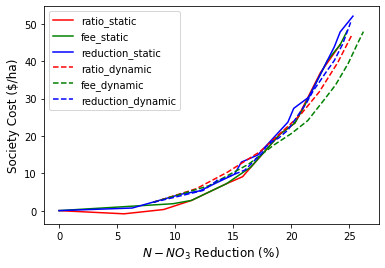

In [7]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_static')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'reduction_static')
#ax.plot(target_1_dt['L_change'], target_1_dt['C'], color = 'y', label = 'target_NMS1')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'reduction_dynamic')
#ax.plot(target_2_dt['L_change'], target_2_dt['C'], linestyle='dashed', color = 'y', label = 'target_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Society Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/net_balance.pdf"
plt.savefig(plot_file_name, dpi=300)